##### Assignment 5 - Classifiers and Dimensionality

## Part 0 - The Data set.

The CSV file is "hockey_data2.csv".  This data came from Kaggle.  It has **a lot** of hockey performance features.  You will want to read up on some of them.  Looking at correlations with Salary might help you find important features.  

## Part 1: Get the DataSet and clean it

1. Read the hockey_data2.csv file into a data frame

1. Display the info

1. Clean up any missing data values.  Use the same process as for the last assignment.

1. Create a "rating" feature that is a category based on "+/-". Base the rating feature so that 0 is the first quartile, 1 is the second quartile, 2 is the third quartile, and 3 is the fourth quartile.  (You can get the quartile values from info()) 

1. Split into train and test sets (70% and 30%)



In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

hockey_df = pd.read_csv('hockey_data2.csv')

print("********Info********")
print(hockey_df.info())


hockey_df = hockey_df.dropna()

qts = hockey_df['+/-'].quantile([0.25, 0.5, 0.75])
hockey_df['rating'] = pd.cut(hockey_df['+/-'], bins=[-np.inf, qts[0.25], qts[0.5], qts[0.75], np.inf], labels=[0, 1, 2, 3]).astype(int)

train_h_df, test_h_df = train_test_split(hockey_df, test_size=0.3, random_state=42)


********Info********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Columns: 154 entries, Salary to GS/G
dtypes: float64(73), int64(71), object(10)
memory usage: 736.4+ KB
None


## Part 2 - Building the decision tree
Train a decision tree using 
* X - Uses your choice of at least 4 features (Not including +/-, or rating)
* y - Classification is "rating"



In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = hockey_df[['GP', 'G', 'A', 'PIM']]
y = hockey_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Part 3 - Evaluation  (Confusion Matrix)
Create and display the confusion matrix for the training set.  

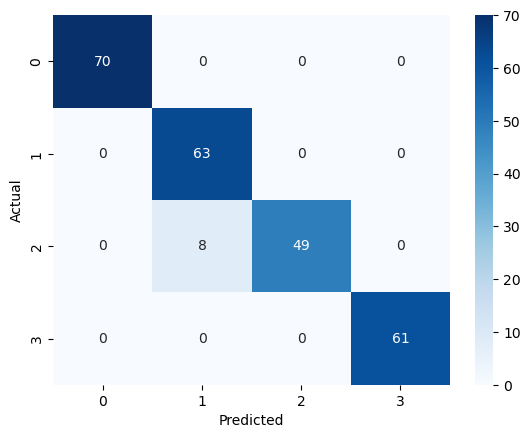

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

y_train_pred = dtc_model.predict(X_train)
conf_mat = confusion_matrix(y_train, y_train_pred)

sb.heatmap(conf_mat, annot=True, cmap="Blues", fmt="g")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Your comments here:

## Part 4 - Evaluation (Other metrics)
Compute Accuracy, Precision, Sensitivity and F1 scores from the training data


In [32]:

accuracy = (conf_mat[0,0] + conf_mat[1,1] + conf_mat[2,2] + conf_mat[3,3]) / conf_mat.sum()

precision = conf_mat.diagonal() / conf_mat.sum(axis=0)
sensitivity = conf_mat.diagonal() / conf_mat.sum(axis=1)
f1_score = 2 * precision * sensitivity / (precision + sensitivity)

print(f"Rating\tAccuracy\tPrecision\tSensitivity\tF1 Score")
for i in range(4):
    print(f"{i}\t{accuracy:>8.3f}\t{precision[i]:>8.3f}\t{sensitivity[i]:>8.3f}\t{f1_score[i]:>8.3f}")
    
print("Overall averages:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision.mean():.3f}")
print(f"Sensitivity: {sensitivity.mean():.3f}")
print(f"F1 Score: {f1_score.mean():.3f}")


Rating	Accuracy	Precision	Sensitivity	F1 Score
0	   0.968	   1.000	   1.000	   1.000
1	   0.968	   0.887	   1.000	   0.940
2	   0.968	   1.000	   0.860	   0.925
3	   0.968	   1.000	   1.000	   1.000
Overall averages:
Accuracy: 0.968
Precision: 0.972
Sensitivity: 0.965
F1 Score: 0.966


## Part 5 - Displaying the decision tree
Export the decision tree to "salary.dot".

In [33]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dtc_model,out_file='salary.dot', feature_names=X_train.columns,
    class_names=['0', '1', '2', '3'],
    filled=True,
    rounded=True,
    special_characters=True
)

with open('salary.dot') as f:
    dot_graph = f.read()

graph = graphviz.Source(dot_graph)

num_nodes = dtc_model.tree_.node_count
print(f"Number of nodes: {num_nodes}")

first_feature = dtc_model.tree_.feature[0]
first_threshold = dtc_model.tree_.threshold[0]
print(f"First split is on feature: '{X_train.columns[first_feature]}' with threshold: {first_threshold}")

num_leaves = dtc_model.tree_.n_leaves
print(f"Number of leaf nodes: {num_leaves}")


Number of nodes: 235
First split is on feature: 'GP' with threshold: 25.0
Number of leaf nodes: 118


### Look at the Dot file and answer the following questions:
1. How many nodes are in the tree?
1. What is the first split
1. How many leaf nodes are in the tree?  (They will have a lable that just gives a GINI impurity value.)
1. What would you suggest to prevent overfitting?

1. Number of nodes: 235
2. First split is on feature: 'GP' with threshold: 25.0
3. Number of leaf nodes: 118
4. We could use parameters like max_depth, min_samples_split, or min_samples_leaf to minimize overfitting, or we could use cross-validation to adjust hyperparameters and estimate performance on unseen data.

### Bonus - Create a .eps or .png file.

To install graphviz, check out https://www.graphviz.org
You will probably need to compile and install graphviz, though there may be an executable version you can download.  

Once you have the dot file, you can render by command line:

```dot -Tps input.dot > output.eps```

```dot -Tpng input.dot > output.png```

Used below command line to generate salary.eps and salary.png from salary.dot
```dot salary.dot -Tpng -o salary.png```
```dot salary.dot -Tps -o salary.eps```

## Part 6 (Base Line) : Cross Validate Using A Decision Tree Classifier 

Do a 5 fold cross validation on the entire data set where

* X - Uses your choice of at least 4 features (Not including +/- or rating)
* y - Target feature is "rating"

Compute and display the confusion matrix, Accuracy, and F1 score for each fold

Record the average accuracy and F1 score.



In [34]:
# Your code here
      
      


## Part 7 - Train and test SVM
Train a SVC with linear kernel on the train set.  Use the same features and target as per the baseline.

1. Use the train set to predict the targets, then compute and display the confusion matrix, Accuracy and F1 score.

1. Use the test set to predict the targets, then compute and display the confusion matrix, Accuracy and F1 score.
  

In [35]:
# Your code here

## Part 8 - Cross validate linear SVM
Do a 5 fold cross validation on a linear SVC model using the same features and target as in the Base Line. Compute and display the confusion matrix, accuracy, and F1 score.

Report the average accuracy and F1 score.


In [36]:
# Your code here


### Compare the results.
1. Based on Part 4, did the SVC model overfit the data?
1. Compare the results of the test set to the cross validation results.
1. How did the linear SVC model perform compared to the decision tree classifier?

Your answers here

## Part 9 - Train and test SVM
Train an SVC using RBF kernel on the train set and then compute and display metrics for the train and test sets as in the BaseLine
  

In [37]:
# Your code here

## Part 10 - Train and test NN

* Use a single hidden layer of size 20
* Use 'logistic' as the activation.  
* Set the maximum number of iterations to 1000 and increase by 1000 until you get convergence or the training time is greater than 2 minutes.
* Use an initial_learning_rate = 0.01  (You can try changing this.)


Use the same features and target as per the baseline.
Use the train set to predict the targets, then compute and display the confusion matrix, Accuracy and F1 score.


In [38]:
# Your code here
 


### Your comparison with previous results here:

## Part 11 - Prepare for PCA

1. Make a copy of the training and test dataframes. (Use these for X for the PCA code)
2. Get the target "rating" from both dataframes.
3. Remove the features +/- and rating from the copies of the training and test sets.  (Since we are going to use all of the input features to determine the principle components it is easier to make a copy and remove a couple features than to list all the features we want.  We can do this once in the copies.)

  

In [39]:
# Your code here

## Part 12 - PCA
1. Create the PCA transform and choose 5 as the number of components to produce.
2. Fit the training set.  (The copy we made in the previous step)
3. Display the components.



In [40]:
# Your code here


### Print each component
Find the index of the maximum value in the component.

In [41]:
# Your code here

Use the indices of the maximum values to find the corresponding feature and record the names here:

## Part 13 - Train and test SVM on PCA
1. Create a two stage pipeline with PCA with 5 components and SVC kernel="rbf" 
2. Train the pipeline on the train set and then compute and display metrics for the train and test sets (as in the BaseLine).
  

In [42]:
# Your code here

### Your comparison with previous results here:

## Part 14 Try feature selection based on PCA.
1. Train an RBF SVC classifier applied to the 5 features discovered in part 12" 
2. Then compute and display metrics for the train and test sets (as in the BaseLine).

## Bonus
1. Use a Stochastic Gradient Descent classifier and compare the performance.
1. Use a Random Forrest classifier and compare the performance. 